In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models,layers
from emnist import list_datasets,extract_test_samples,extract_training_samples
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

list_datasets()

x_train, y_train = extract_training_samples('balanced')
x_test, y_test = extract_test_samples('balanced')

In [2]:
# Verileri normalize et
x_train = x_train.squeeze()
x_train = x_train.astype('float32') / 255
x_test= x_test.squeeze()
x_test = x_test.astype('float32') / 255

num_classes = 47

# Etiketleri kategorik hale getir
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = np.array(x_train)
x_test = np.array(x_test)

In [3]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [5]:
#NN Modeli oluşturma
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(47, activation='softmax'))

opt=Adam(learning_rate=0.001)

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 16)               

In [6]:
history = model.fit(x_train,y_train, epochs=50, batch_size=32,validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50


3525/3525 [==============================] - 23s 5ms/step - loss: 1.4806 - accuracy: 0.5894 - val_loss: 0.9104 - val_accuracy: 0.7241
Epoch 2/50
3525/3525 [==============================] - 19s 6ms/step - loss: 0.9079 - accuracy: 0.7198 - val_loss: 0.7805 - val_accuracy: 0.7598
Epoch 3/50
3525/3525 [==============================] - 18s 5ms/step - loss: 0.8081 - accuracy: 0.7464 - val_loss: 0.7392 - val_accuracy: 0.7737
Epoch 4/50
3525/3525 [==============================] - 19s 5ms/step - loss: 0.7560 - accuracy: 0.7603 - val_loss: 0.6831 - val_accuracy: 0.7892
Epoch 5/50
3525/3525 [==============================] - 17s 5ms/step - loss: 0.7221 - accuracy: 0.7688 - val_loss: 0.6692 - val_accuracy: 0.7905
Epoch 6/50
3525/3525 [==============================] - 17s 5ms/step - loss: 0.7005 - accuracy: 0.7746 - val_loss: 0.6450 - val_accuracy: 0.8008
Epoch 7/50
3525/3525 [==============================] - 18s 5ms/step - loss: 0.6824 - accuracy: 0.7802 - val_loss: 0.6418 - val_

In [7]:
# Modeli test et
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

588/588 [==============================] - 2s 3ms/step - loss: 0.5560 - accuracy: 0.8245
Test accuracy: 0.8244680762290955


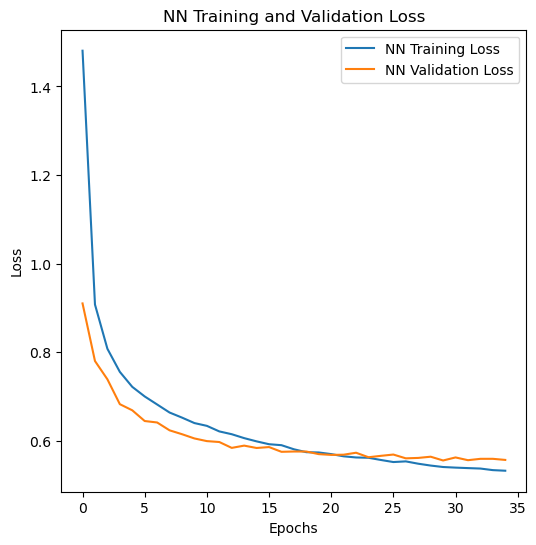

In [10]:
# Eğitim ve Doğrulama Kayıplarını Çizme
plt.figure(figsize=(6, 6))

# FNN Eğitim ve Doğrulama Kayıpları
plt.plot(history.history['loss'], label='NN Training Loss')
plt.plot(history.history['val_loss'], label='NN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('NN Training and Validation Loss')
plt.legend()

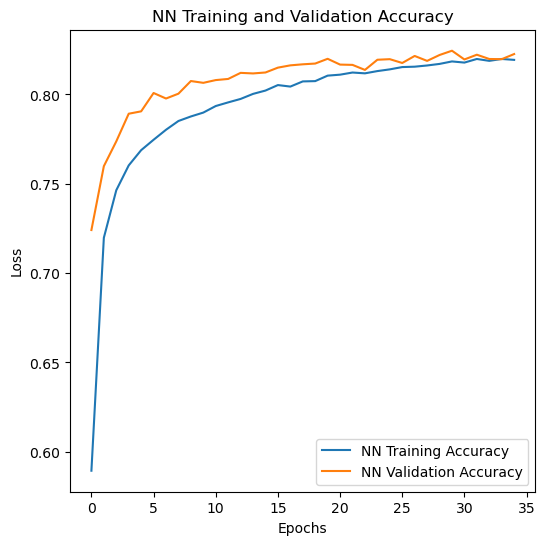

In [12]:
# Eğitim ve Doğrulama Accuracy Çizme
plt.figure(figsize=(6, 6))

# FCNN Eğitim ve Doğrulama Doğruluğu

plt.plot(history.history['accuracy'], label='NN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='NN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('NN Training and Validation Accuracy')
plt.legend()